<h1 style="text-align:center;">ESCUELA POLITÉCNICA NACIONAL</h1>
<h2 style="text-align:center;">FACULTAD DE INGENIERÍA DE SISTEMAS</h2>
<h3 style="text-align:center;">INGENIERÍA EN CIENCIA DE LA COMPUTACION</h3>

**PERÍODO ACADÉMICO:** 2025-B  
**ASIGNATURA:** ICCD412 Métodos Numéricos  
**GRUPO:** GR1  
**Taller 1b**   
**ALUMNO:** Carrion Mauricio

In [22]:
%load_ext autoreload
import numpy as np
import matplotlib.pyplot as plt
%autoreload 2
from src import eliminacion_gaussiana
from src import gauss_jordan
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


* ### Solucionar bug del codigo


In [23]:
Ab = [[4,1,2,9], [2,4,-1,-5], [1,1,-3,-9]]

eliminacion_gaussiana(Ab)

[12-25 19:24:03][INFO] 
[[  4.     1.     2.     9.  ]
 [  0.     3.5   -2.    -9.5 ]
 [  0.     0.75  -3.5  -11.25]]
[12-25 19:24:03][INFO] 
[[ 4.          1.          2.          9.        ]
 [ 0.          3.5        -2.         -9.5       ]
 [ 0.          0.         -3.07142857 -9.21428571]]


{'x': array([ 1., -1.,  3.]),
 'stats': {'cambios': 0, 'mult_div': 17, 'sumas_restas': 13}}

* ### Implemente el conteo de sumas y restas para ambos métodos
* ### Determine el número de intercambios de filas usando el código base

In [24]:
from src import gauss_jordan
# Sistema:
# 0x + 2y + 3z = 8
# 4x + 6y + 7z = -3
# 2x + 1y + 6z = 5

AB = [
    [0, 2, 3, 8],
    [4, 6, 7, -3],
    [2, 1, 6, 5]
]

print("=== 1. Prueba de Eliminación Gaussiana ===")
res_gauss = eliminacion_gaussiana(np.array(AB, dtype=float))
print(f"Solución x: {res_gauss['x']}")
print(f"Estadísticas: {res_gauss['stats']}")
print(f"-> Intercambios de fila realizados: {res_gauss['stats']['cambios']}")

print("\n=== 2. Prueba de Gauss-Jordan ===")
res_jordan = gauss_jordan(np.array(AB, dtype=float))
print(f"Solución x: {res_jordan['x']}")
print(f"Estadísticas: {res_jordan['stats']}")

=== 1. Prueba de Eliminación Gaussiana ===
[12-25 19:24:03][INFO] 
[[ 4.   6.   7.  -3. ]
 [ 0.   2.   3.   8. ]
 [ 0.  -2.   2.5  6.5]]
[12-25 19:24:03][INFO] 
[[ 4.   6.   7.  -3. ]
 [ 0.   2.   3.   8. ]
 [ 0.   0.   5.5 14.5]]
Solución x: [-5.43181818  0.04545455  2.63636364]
Estadísticas: {'cambios': 1, 'mult_div': 17, 'sumas_restas': 13}
-> Intercambios de fila realizados: 1

=== 2. Prueba de Gauss-Jordan ===
[12-25 19:24:03][INFO] 
[[ 1.    1.5   1.75 -0.75]
 [ 0.    2.    3.    8.  ]
 [ 0.   -2.    2.5   6.5 ]]
[12-25 19:24:03][INFO] 
[[ 1.    0.   -0.5  -6.75]
 [ 0.    1.    1.5   4.  ]
 [ 0.    0.    5.5  14.5 ]]
[12-25 19:24:03][INFO] 
[[ 1.          0.          0.         -5.43181818]
 [ 0.          1.          0.          0.04545455]
 [ 0.          0.          1.          2.63636364]]
Solución x: [-5.43181818  0.04545455  2.63636364]
Estadísticas: {'cambios': 1, 'mult_div': 36, 'sumas_restas': 24}


* ### Compare la complejidad computacional del método de eliminación gaussiana vs Gauss-Jordan.

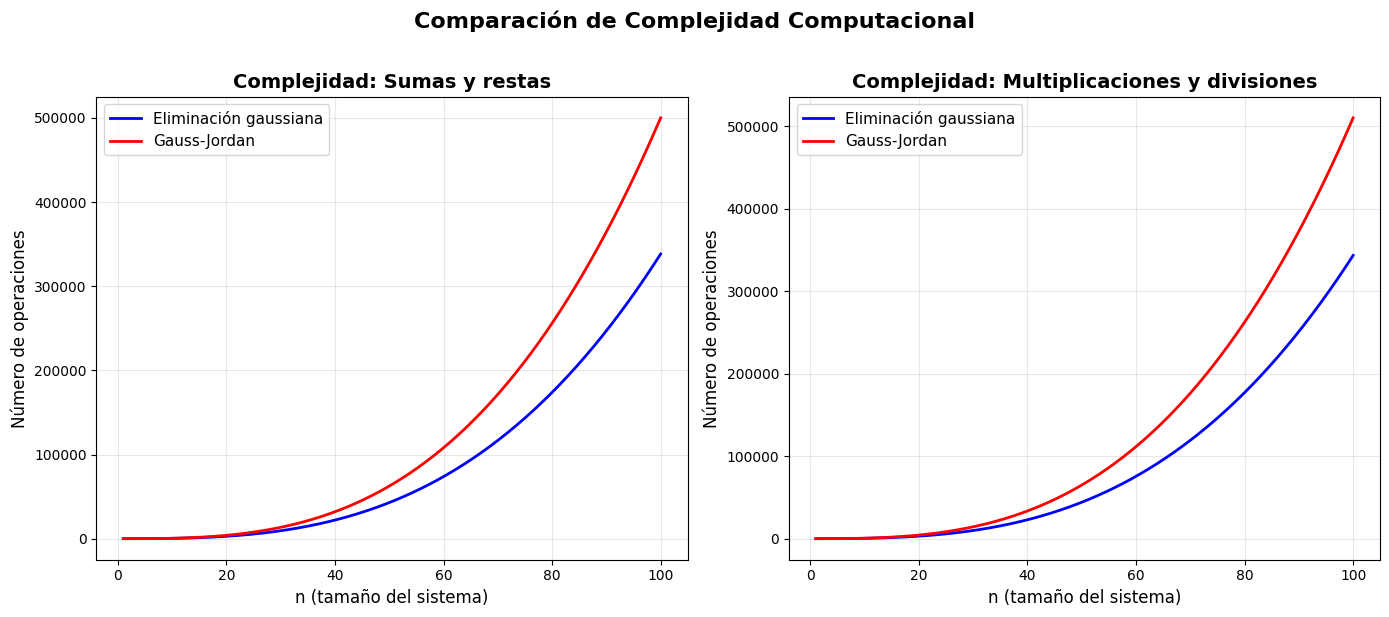

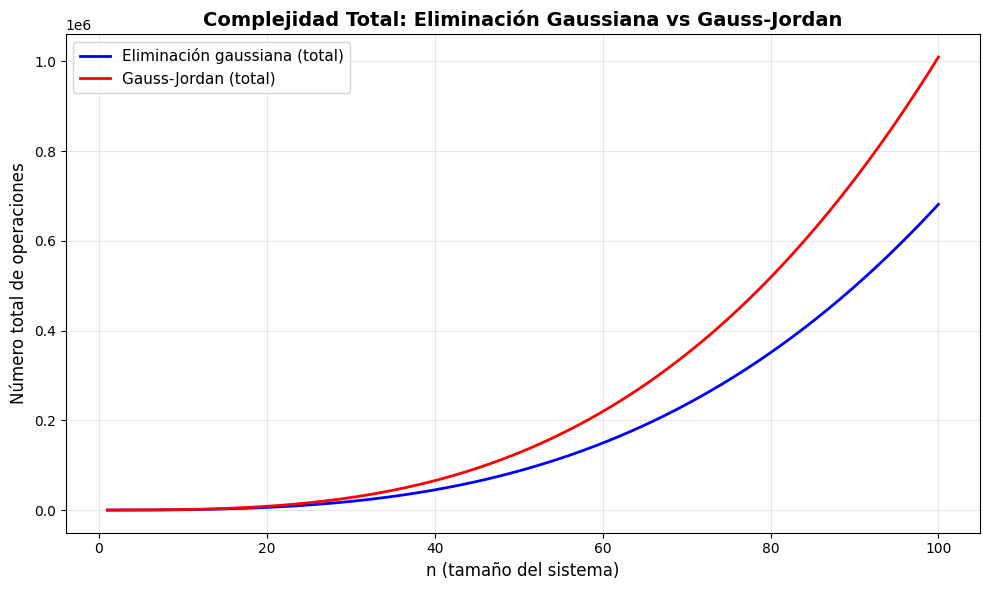

Comparación de operaciones para diferentes tamaños de matriz:

n      EG Total        GJ Total        Diferencia     
-------------------------------------------------------
10     805             1090            285            
20     5910            8380            2470           
50     87025           127450          40425          
100    681550          1009900         328350         


In [25]:
import numpy as np
import matplotlib.pyplot as plt

n = np.linspace(1, 100, 500)

# Eliminación gaussiana
# Sumas y restas
eg_sumas = n**3/3 + n**2/2 - 5*n/6
# Multiplicaciones y divisiones
eg_mult = n**3/3 + n**2 - n/3

# Gauss-Jordan
# Sumas-restas
gj_sumas = n**3/2 - n/2
# Multiplicaciones-divisiones
gj_mult = n**3/2 + n**2 - n/2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Grafica de Sumas y restas
ax1.plot(n, eg_sumas, 'b-', linewidth=2, label='Eliminación gaussiana')
ax1.plot(n, gj_sumas, 'r-', linewidth=2, label='Gauss-Jordan')
ax1.set_xlabel('n (tamaño del sistema)', fontsize=12)
ax1.set_ylabel('Número de operaciones', fontsize=12)
ax1.set_title('Complejidad: Sumas y restas', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Gráfica de Multiplicaciones y divisiones
ax2.plot(n, eg_mult, 'b-', linewidth=2, label='Eliminación gaussiana')
ax2.plot(n, gj_mult, 'r-', linewidth=2, label='Gauss-Jordan')
ax2.set_xlabel('n (tamaño del sistema)', fontsize=12)
ax2.set_ylabel('Número de operaciones', fontsize=12)
ax2.set_title('Complejidad: Multiplicaciones y divisiones', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.suptitle('Comparación de Complejidad Computacional', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Gráfica Comparación del total de operaciones
fig2, ax3 = plt.subplots(figsize=(10, 6))

eg_total = eg_sumas + eg_mult
gj_total = gj_sumas + gj_mult

ax3.plot(n, eg_total, 'b-', linewidth=2, label='Eliminación gaussiana (total)')
ax3.plot(n, gj_total, 'r-', linewidth=2, label='Gauss-Jordan (total)')
ax3.set_xlabel('n (tamaño del sistema)', fontsize=12)
ax3.set_ylabel('Número total de operaciones', fontsize=12)
ax3.set_title('Complejidad Total: Eliminación Gaussiana vs Gauss-Jordan', fontsize=14, fontweight='bold')
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Comparación de operaciones para diferentes tamaños de matriz:\n")
print(f"{'n':<6} {'EG Total':<15} {'GJ Total':<15} {'Diferencia':<15}")
print("-" * 55)
for size in [10, 20, 50, 100]:
    eg_ops = (size**3/3 + size**2/2 - 5*size/6) + (size**3/3 + size**2 - size/3)
    gj_ops = (size**3/2 - size/2) + (size**3/2 + size**2 - size/2)
    diff = gj_ops - eg_ops
    print(f"{size:<6} {eg_ops:<15.0f} {gj_ops:<15.0f} {diff:<15.0f}")

Generando y resolviendo 9 sistemas de ecuaciones...
[12-25 19:26:34][INFO] 
[[ 0.89051372  0.85612222  0.02595877  0.867837    0.78717207  0.02265383]
 [ 0.         -0.11016161  0.61117676 -0.22403044  0.04690495  0.52250889]
 [ 0.         -0.49378959  0.29096811  0.01554219 -0.1894175   0.79902868]
 [ 0.          0.41954874  0.10769508  0.72168941 -0.00524552  0.90436966]
 [ 0.          0.33730599  0.18592645  0.85990012  0.18316583  0.72042679]]
[12-25 19:26:34][INFO] 
[[ 0.89051372  0.85612222  0.02595877  0.867837    0.78717207  0.02265383]
 [ 0.         -0.49378959  0.29096811  0.01554219 -0.1894175   0.79902868]
 [ 0.          0.          0.54626345 -0.22749782  0.0891629   0.3442502 ]
 [ 0.          0.          0.35491638  0.73489484 -0.16618426  1.58326506]
 [ 0.          0.          0.38468578  0.87051694  0.05377538  1.26624057]]
[12-25 19:26:34][INFO] 
[[ 0.89051372  0.85612222  0.02595877  0.867837    0.78717207  0.02265383]
 [ 0.         -0.49378959  0.29096811  0.01554219

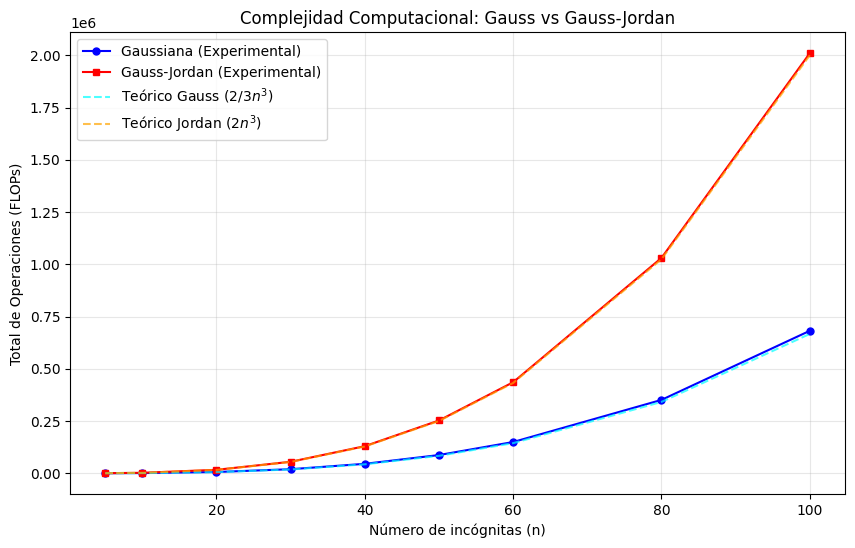

In [28]:
# Tamaños de matriz (n) a evaluar.
ns = [5, 10, 20, 30, 40, 50, 60, 80, 100]
resultados = []

print(f"Generando y resolviendo {len(ns)} sistemas de ecuaciones...")

for n in ns:
    # Crear sistema aleatorio Ax = b
    A = np.random.rand(n, n)
    b = np.random.rand(n, 1)
    Ab = np.hstack([A, b])
    
    # Eliminacion Gaussiana
    r_gauss = eliminacion_gaussiana(Ab.copy())
    # Sumamos multiplicaciones/divisiones y sumas/restas
    total_gauss = r_gauss['stats']['mult_div'] + r_gauss['stats']['sumas_restas']
    
    # Gauss-Jordan
    r_jordan = gauss_jordan(Ab.copy())
    total_jordan = r_jordan['stats']['mult_div'] + r_jordan['stats']['sumas_restas']
    
    # Gaussiana ≈ (2/3) * n^3
    # Gauss-Jordan ≈ 2 * n^3 (aprox 3 veces más que Gauss con esta implementación)
    teo_gauss = (2/3) * n**3
    teo_jordan = 2 * n**3
    
    resultados.append({
        'n': n,
        'Gauss (Real)': total_gauss,
        'Jordan (Real)': total_jordan,
        'Gauss (Teórico)': teo_gauss,
        'Jordan (Teórico)': teo_jordan,
        'Ratio (J/G)': total_jordan / total_gauss if total_gauss > 0 else 0
    })

# Convertir a DataFrame para visualizar tabla
df = pd.DataFrame(resultados)

# Resultados
print("\n=== COMPARACIÓN DE OPERACIONES REALES VS TEÓRICAS ===")
# Mostramos columnas clave
print(df[['n', 'Gauss (Real)', 'Jordan (Real)', 'Ratio (J/G)']].to_string(index=False))

plt.figure(figsize=(10, 6))

# Graficar datos experimentales (Puntos y líneas sólidas)
plt.plot(df['n'], df['Gauss (Real)'], 'o-', label='Gaussiana (Experimental)', color='blue', markersize=5)
plt.plot(df['n'], df['Jordan (Real)'], 's-', label='Gauss-Jordan (Experimental)', color='red', markersize=5)

# Graficar curvas teóricas (Líneas punteadas)
plt.plot(df['n'], df['Gauss (Teórico)'], '--', label='Teórico Gauss ($2/3 n^3$)', color='cyan', alpha=0.7)
plt.plot(df['n'], df['Jordan (Teórico)'], '--', label='Teórico Jordan ($2 n^3$)', color='orange', alpha=0.7)

plt.xlabel('Número de incógnitas (n)')
plt.ylabel('Total de Operaciones (FLOPs)')
plt.title('Complejidad Computacional: Gauss vs Gauss-Jordan')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()